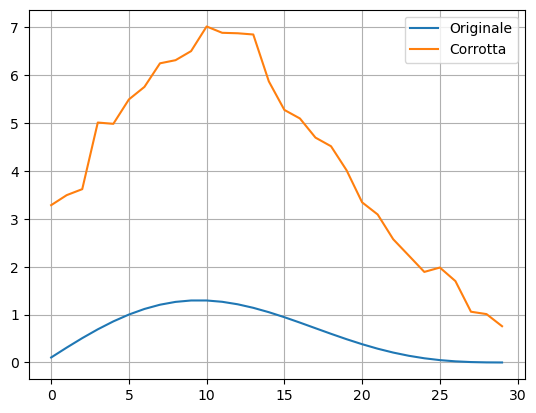

In [1]:
from ProblemiInversi import examples, operators, solvers, utilities
import numpy as np
import matplotlib.pyplot as plt

# Dimensione del problema
n = 30

# Generazione della matrice del problema A e dei dati x
A, x = examples.gravity(n)

# Costruzione del problema test (con rumore)
y = A @ x
y_delta = y + utilities.gaussian_noise(y, noise_level=0.05)

# Visualizzazione del problema test
plt.plot(x)
plt.plot(y_delta)
plt.legend(["Originale", "Corrotta"])
plt.grid()
plt.show()

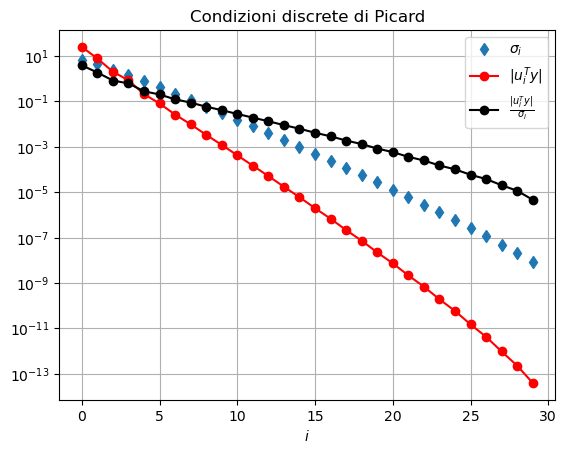

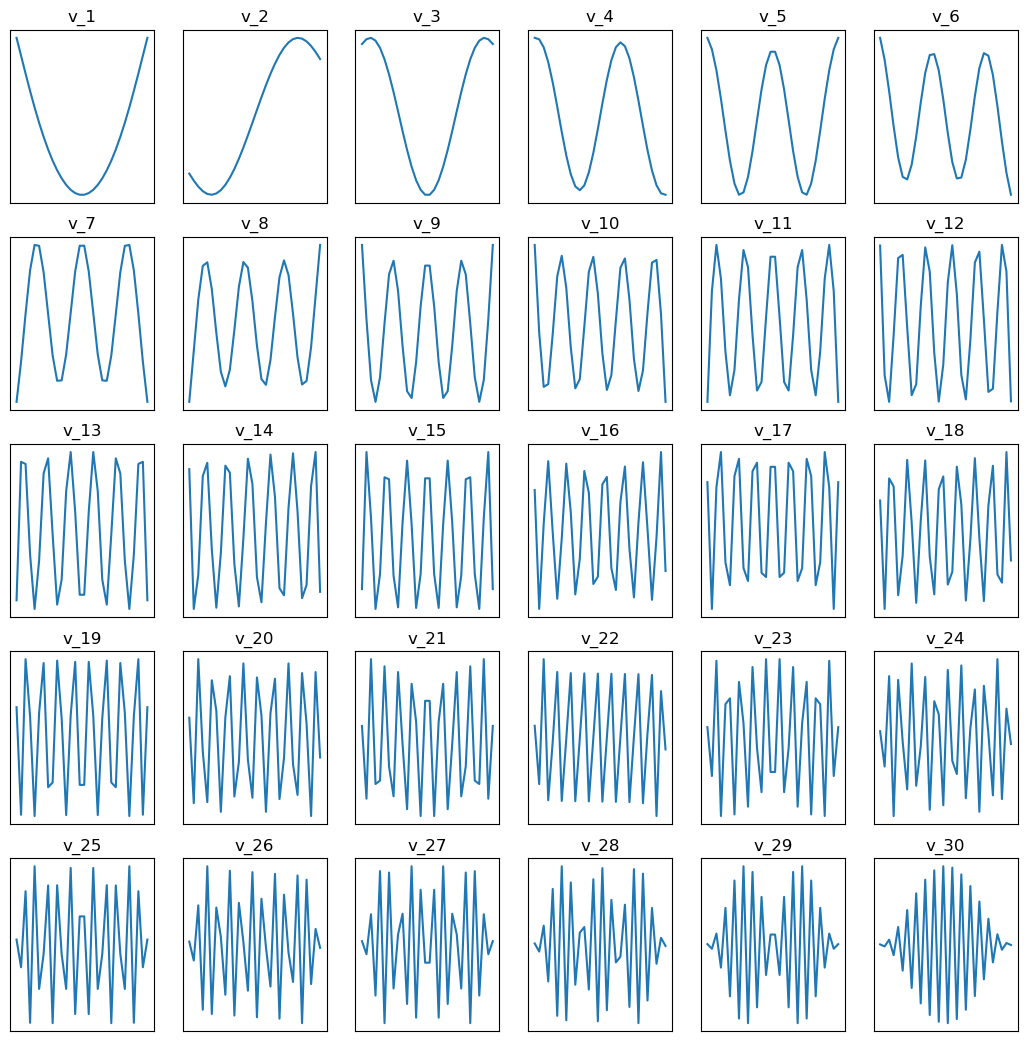

In [2]:
# Condizioni discrete di Picard
U, s, VT = np.linalg.svd(A, full_matrices=True) # Calcolo SVD di A

# Visualizzazione condizioni di Picard (i.e. sigma_i vs | u_i^T y | )
uTy = np.abs(U.T @ y)
pic_coeff = uTy / s

plt.semilogy(s, "d")
plt.semilogy(uTy, "ro-")
plt.semilogy(pic_coeff, "ko-")
plt.legend([r"$\sigma_i$", r"$| u_i^T y |$", r"$\frac{| u_i^T y |}{\sigma_i}$"])
plt.xlabel(r"$i$")
plt.title("Condizioni discrete di Picard")
plt.grid()
plt.show()

# Visualizzazione vettori v_i
plt.figure(figsize=(13, 13))
for i in range(VT.shape[0]):
    plt.subplot(5, 6, i+1)
    plt.plot(VT[i, :])
    plt.title(f"v_{i+1}")
    plt.xticks([])
    plt.yticks([])
    plt.grid()
plt.show()

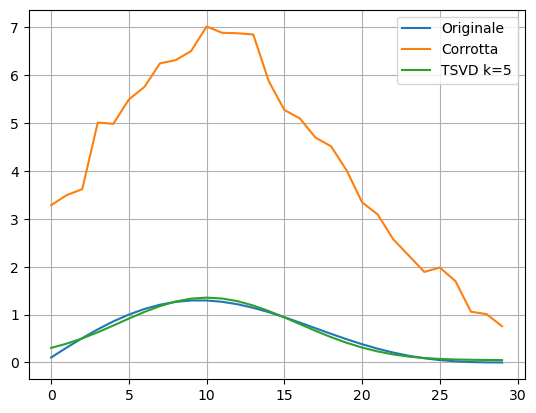

In [3]:
# TSVD
tsvd_solver = solvers.TSVD(A)

# Scelta di k
k = 5

# Soluzione
x_tsvd = tsvd_solver.solve(y_delta, k)

# Visualizzazione soluzione
plt.plot(x)
plt.plot(y_delta)
plt.plot(x_tsvd)
plt.legend(["Originale", "Corrotta", f"TSVD k={k}"])
plt.grid()
plt.show()

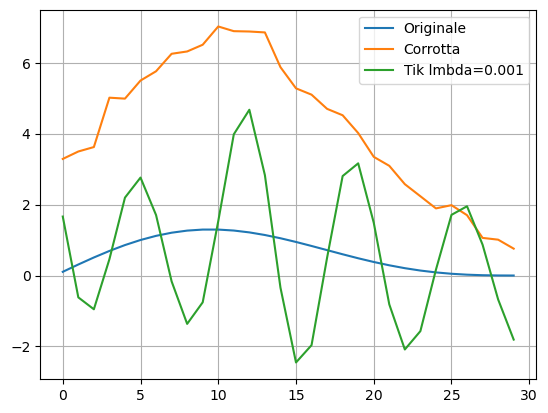

In [4]:
# Tikhonov
tik_solver = solvers.Tikhonov(A)

# Scelta di lambda, L
lmbda = 0.001

# Soluzione
x_tik = tik_solver.solve(y_delta, lmbda)

# Visualizzazione soluzione
plt.plot(x)
plt.plot(y_delta)
plt.plot(x_tik)
plt.legend(["Originale", "Corrotta", f"Tik lmbda={lmbda}"])
plt.grid()
plt.show()

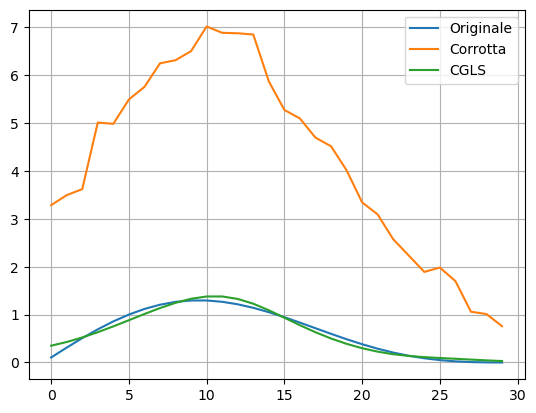

In [5]:
# CGLS
cgls_solver = solvers.CGLS(A)

# Scelta di x0, kmax, atolf, tolx
x0 = np.zeros_like(x)
kmax = 3
tolf = 1e-8
tolx = 1e-8

# Soluzione
x_cgls = cgls_solver.solve(y_delta, x0, kmax, tolf, tolx)

# Visualizzazione soluzione
plt.plot(x)
plt.plot(y_delta)
plt.plot(x_cgls)
plt.legend(["Originale", "Corrotta", f"CGLS"])
plt.grid()
plt.show()